# Centering and Scaling¶ 

1. Numeric variables are often on different scales and cover different ranges, so they can't be easily compared.
   
2. What's more, variables with large values can dominate those with smaller values when using certain modeling techniques.

3. Centering and scaling is a common preprocessing task that puts numeric variables on a common scale so no single variable will dominate the others.

4. The simplest way to center data is to subtract the mean value from each data point.

5. Subtracting the mean centers the data around zero and sets the new mean to zero.

6. Let's try zero-centering the mtcars dataset, a small set of car-related data.  

In [1]:
import numpy as np 
import pandas as pd 
import os 
from sklearn import preprocessing



%matplotlib inline  

In [2]:
os.getcwd()

'/kaggle/working'

In [3]:
os.chdir('/kaggle/')

In [4]:
os.getcwd()

'/kaggle'

In [5]:
os.listdir('/kaggle/')

['src', 'lib', 'input', 'nbdev', 'working']

In [6]:
os.listdir('/kaggle/input/')

['mtcars']

In [7]:
os.listdir('input/mtcars')  


['mtcars.csv']

In [8]:
mtcars = pd.read_csv("/kaggle/input/mtcars/mtcars.csv")   

In [9]:
print(mtcars.head()) 

               model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


In [10]:
# Set row index to car model: 

mtcars.index = mtcars.model  


# Drop car name column: 


del mtcars["model"]  
 

In [11]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
# Calculate column means: 

col_mean = mtcars.sum() / mtcars.shape[0] 
col_mean

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

Conclusion: 

1. With the column means in hand, we just need to subtract the column means from each row in an element-wise fashion to zero center the data.
   
2. Pandas performs math operations involving DataFrames and columns on an element-wise row-by-row basis by default.

3. So we can simply subtract our column means series from the data set to center it: 


In [13]:
centered = mtcars - col_mean 
centered.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,32.000000,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,32.000000,32.0000
mean,-3.108624e-15,0.000000,2.131628e-14,0.000000,-1.526557e-16,-4.440892e-16,-2.609024e-15,0.000000,0.000000,0.000000,0.0000
std,6.026948e+00,1.785922,1.239387e+02,68.562868,5.346787e-01,9.784574e-01,1.786943e+00,0.504016,0.498991,0.737804,1.6152
min,-9.690625e+00,-2.187500,-1.596219e+02,-94.687500,-8.365625e-01,-1.704250e+00,-3.348750e+00,-0.437500,-0.406250,-0.687500,-1.8125
25%,-4.665625e+00,-2.187500,-1.098969e+02,-50.187500,-5.165625e-01,-6.360000e-01,-9.562500e-01,-0.437500,-0.406250,-0.687500,-0.8125
50%,-8.906250e-01,-0.187500,-3.442187e+01,-23.687500,9.843750e-02,1.077500e-01,-1.387500e-01,-0.437500,-0.406250,0.312500,-0.8125
75%,2.709375e+00,1.812500,9.527813e+01,33.312500,3.234375e-01,3.927500e-01,1.051250e+00,0.562500,0.593750,0.312500,1.1875
max,1.380937e+01,1.812500,2.412781e+02,188.312500,1.333437e+00,2.206750e+00,5.051250e+00,0.562500,0.593750,1.312500,5.1875


1. put it all on a common scale.
   
2. One way to put data on a common scale is to divide by the standard deviation.

3. Standard deviation is a statistic that describes the spread of numeric data.

4. The higher the standard deviation, the further the data points tend to be spread away from the mean value.

5. You can get standard deviations with df.std() 

In [14]:
column_deviation = mtcars.std(axis = 0) 

centered_and_scaled = centered / column_deviation 

centered_and_scaled.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01
mean,-5.551115e-16,-2.775558e-17,1.110223e-16,2.775558e-17,-2.775558e-16,-3.608225e-16,-1.443290e-15,0.000000,5.551115e-17,-2.775558e-17,2.775558e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.607883e+00,-1.224858e+00,-1.287910e+00,-1.381032e+00,-1.564608e+00,-1.741772e+00,-1.874010e+00,-0.868028,-8.141431e-01,-9.318192e-01,-1.122152e+00
25%,-7.741273e-01,-1.224858e+00,-8.867035e-01,-7.319924e-01,-9.661175e-01,-6.500027e-01,-5.351317e-01,-0.868028,-8.141431e-01,-9.318192e-01,-5.030337e-01
50%,-1.477738e-01,-1.049878e-01,-2.777331e-01,-3.454858e-01,1.841059e-01,1.101223e-01,-7.764656e-02,-0.868028,-8.141431e-01,4.235542e-01,-5.030337e-01
75%,4.495434e-01,1.014882e+00,7.687521e-01,4.858679e-01,6.049193e-01,4.013971e-01,5.882951e-01,1.116036,1.189901e+00,4.235542e-01,7.352031e-01
max,2.291272e+00,1.014882e+00,1.946754e+00,2.746567e+00,2.493904e+00,2.255336e+00,2.826755e+00,1.116036,1.189901e+00,1.778928e+00,3.211677e+00


1. After dividing by the standard deviation, every variable now has a standard deviation of 1.
   
2. At this point, all the columns have roughly the same mean and scale of spread about the mean.  

3. Manually centering and scaling as we've done is a good exercise, but it is often possible to perform common data preprocessing automatically using functions built into Python libraries.

4. The Python library scikit-learn, a popular package for predictive modeling and data analysis, has preprocessing tools including a scale() function for centering and scaling data:

In [15]:
from sklearn import preprocessing

In [16]:
# Scale the data: 

scaled_data = preprocessing.scale(mtcars) 

# Remake the DataFrame 
scaled_data = pd.DataFrame(scaled_data) 
scaled_data.describe() 
 


,0,1,2,3,4,5,6,7,8,9,10
count,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,3.200000e+01,3.200000e+01
mean,-4.996004e-16,2.775558e-17,1.665335e-16,0.000000,-3.053113e-16,-4.718448e-16,-1.471046e-15,0.000000,0.000000,-2.775558e-17,-2.775558e-17
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001,1.016001e+00,1.016001e+00
min,-1.633610e+00,-1.244457e+00,-1.308518e+00,-1.403130,-1.589643e+00,-1.769642e+00,-1.903996e+00,-0.881917,-0.827170,-9.467293e-01,-1.140108e+00
25%,-7.865141e-01,-1.244457e+00,-9.008917e-01,-0.743705,-9.815764e-01,-6.604034e-01,-5.436944e-01,-0.881917,-0.827170,-9.467293e-01,-5.110827e-01
50%,-1.501383e-01,-1.066677e-01,-2.821771e-01,-0.351014,1.870518e-01,1.118844e-01,-7.888899e-02,-0.881917,-0.827170,4.303315e-01,-5.110827e-01
75%,4.567366e-01,1.031121e+00,7.810529e-01,0.493642,6.145986e-01,4.078199e-01,5.977084e-01,1.133893,1.208941,4.303315e-01,7.469671e-01
max,2.327934e+00,1.031121e+00,1.977904e+00,2.790515,2.533809e+00,2.291423e+00,2.871986e+00,1.133893,1.208941,1.807392e+00,3.263067e+00


Note: 

1. preprocessing.scale() returns arrays so we convert it back into a DataFrame.

2. the values are almost the same as those we calculated manually but not exactly the same. These small differences are likely due to rounding and details of the scikit-learn implementation of centering and scaling.

# Dealing With Skewed Data¶ 

1. The distribution of data--its overall shape and how it is spread out--can have a significant impact on analysis and modeling.
   
2. Data that is roughly evenly spread around the mean value--known as normally distributed data--tends to be well-behaved.

3. On the other hand, some data sets exhibit significant skewness or asymmetry. To illustrate, let's generate a few distributions



array([[<Axes: title={'center': '0'}>]], dtype=object)

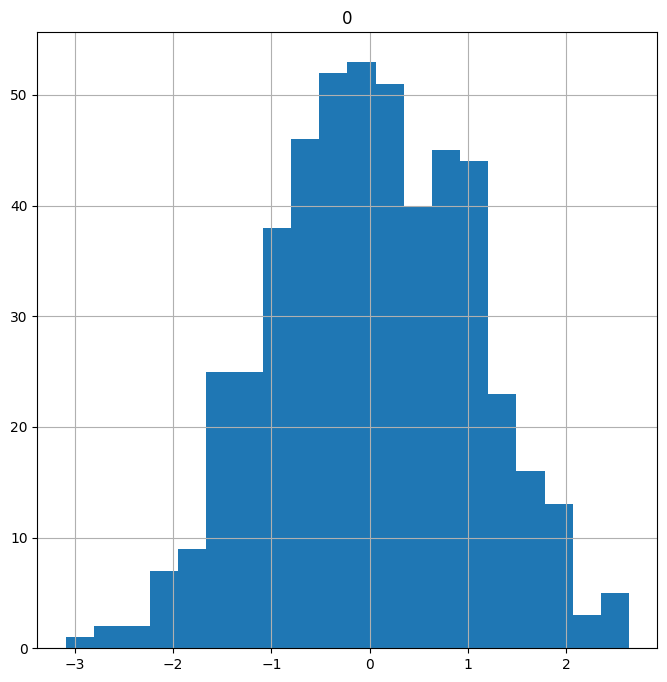

In [17]:
# 1. Generate normal data
# 2. Convert to DF 
# 3. Plot histogram 

nor_dis = np.random.normal(size = 500) 

nor_dis = pd.DataFrame(nor_dis) 

nor_dis.hist(figsize = (8, 8),
             bins = 20)  


# The normally distributed data looks roughly symmetric with a bell-shaped curve. 


array([[<Axes: title={'center': '0'}>]], dtype=object)

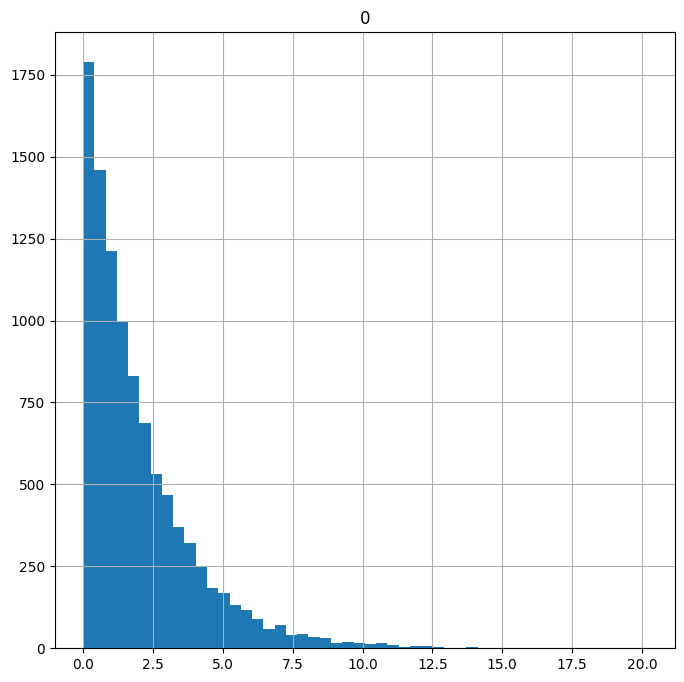

In [18]:
# 1. Generate some skewed data
# 2. Convert to df 
# 3. plot histogram 

skewed_data = np.random.exponential(scale = 2,
                                   size = 10000) 

skewed_data = pd.DataFrame(skewed_data) 

skewed_data.hist(figsize = (8, 8),
                 bins =50)  
 


1. Data with a long tail that goes off to the right is called positively skewed or right skewed.
   
2. When you have a skewed distribution like the one above, the extreme values in the long tail can have a disproportionately large influence on whatever test you perform or models you build.

3. Reducing skew may improve your results.

4. Taking the square root of each data point or taking the natural logarithm of each data point are two simple transformations that can reduce skew.

5. Let's see their effects on the skewed data. 



array([[<Axes: title={'center': '0'}>]], dtype=object)

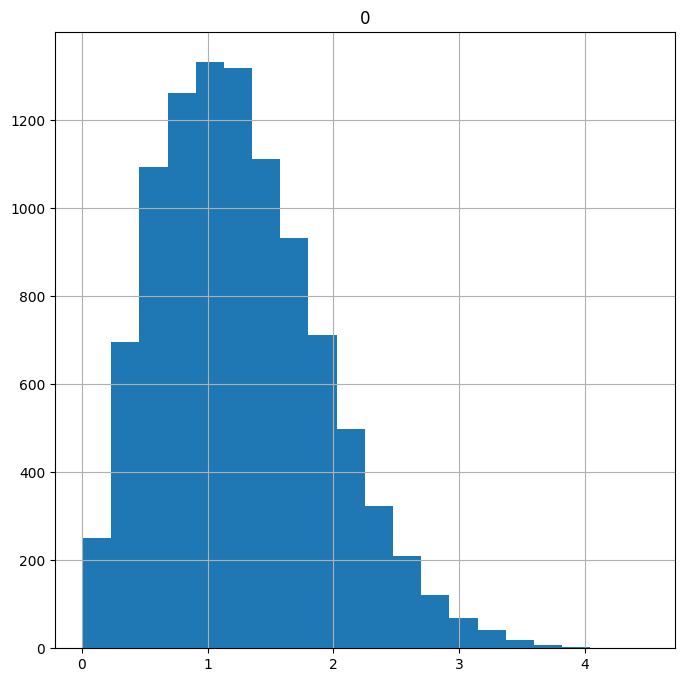

In [19]:
#  Get the square root of data points: 

skewed_transformed = skewed_data.apply(np.sqrt) 

skewed_transformed.hist(figsize = (8, 8),
                       bins = 20)  



Note: The df.apply() function applies a given function to each row or column of the DataFrame. In this case we pass in np.sqrt to get the square root of each value.

array([[<Axes: title={'center': '0'}>]], dtype=object)

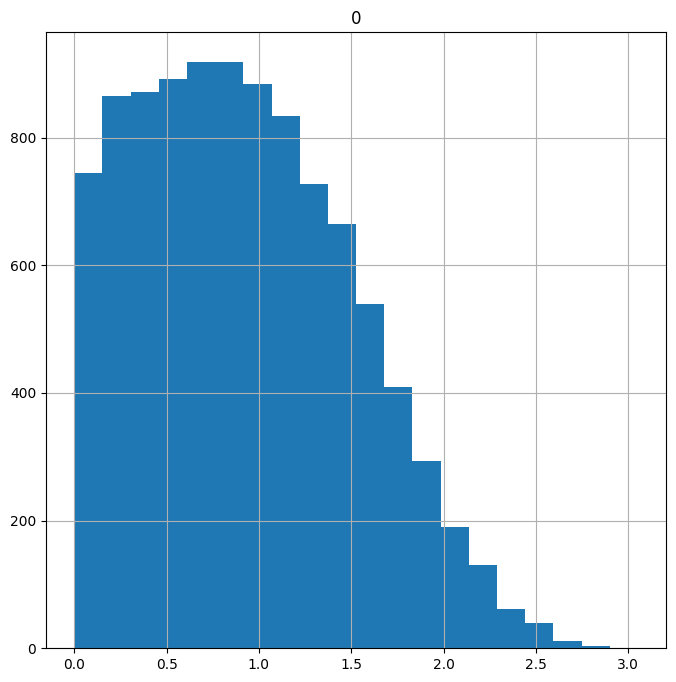

In [20]:
# Get the log of the data

log_data = (skewed_data+1).apply(np.log)   

log_data.hist(figsize = (8, 8),
             bins = 20)  


Note: 

1. Adding 1 before taking the log ensures we don't end up with negative values.

2. Both the sqrt() and log() transforms reduced the skew of the data.

3. It's still not quite normally distributed, but the amount of extreme data in the tails has been reduced to the point where we might not be so worried about it having a large influence on our results.

# Highly Correlated Variables

1. In predictive modeling, each variable used to construct a model should ideally represent a unique feature of the data.
   
2. In other words, you want each variable to tell you something different. In reality, variables often exhibit collinearity--a strong correlation or tendency to move together, typically due to some underlying similarity or common influencing factor.

3. Variables with strong correlations can interfere with one another when performing modeling and muddy results.

You can check the pairwise correlations between numeric variables using the df.corr() function:



In [21]:
# Check the pairwise correlations of 6 variables: 

mtcars.iloc[:,0:6].corr() 

,mpg,cyl,disp,hp,drat,wt
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000


1. A positive correlation implies that when one variable goes up the other tends to go up as well.
  
2. Negative correlations indicate an inverse relationship: when one variable goes up the other tends to go down.

3. A correlation near zero indicates low correlation while a correlation near -1 or 1 indicates a large negative or positive correlation.

4. Inspecting the data table, we see that the number of cylinders a car has (cyl) and its weight (wt) have fairly strong negative correlations to gas mileage (mpg.). This indicates that heavier cars and cars with more cylinders tend to get lower gas mileage.

5. A scatter plot matrix can be a helpful visual aide for inspecting collinearity. 

In [22]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cyl', ylabel='mpg'>,
        <Axes: xlabel='disp', ylabel='mpg'>,
        <Axes: xlabel='hp', ylabel='mpg'>,
        <Axes: xlabel='drat', ylabel='mpg'>,
        <Axes: xlabel='wt', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cyl'>,
        <Axes: xlabel='cyl', ylabel='cyl'>,
        <Axes: xlabel='disp', ylabel='cyl'>,
        <Axes: xlabel='hp', ylabel='cyl'>,
        <Axes: xlabel='drat', ylabel='cyl'>,
        <Axes: xlabel='wt', ylabel='cyl'>],
       [<Axes: xlabel='mpg', ylabel='disp'>,
        <Axes: xlabel='cyl', ylabel='disp'>,
        <Axes: xlabel='disp', ylabel='disp'>,
        <Axes: xlabel='hp', ylabel='disp'>,
        <Axes: xlabel='drat', ylabel='disp'>,
        <Axes: xlabel='wt', ylabel='disp'>],
       [<Axes: xlabel='mpg', ylabel='hp'>,
        <Axes: xlabel='cyl', ylabel='hp'>,
        <Axes: xlabel='disp', ylabel='hp'>,
        <Axes: xlabel='hp', ylabel='hp'>,
        <Axes: xlabel='drat

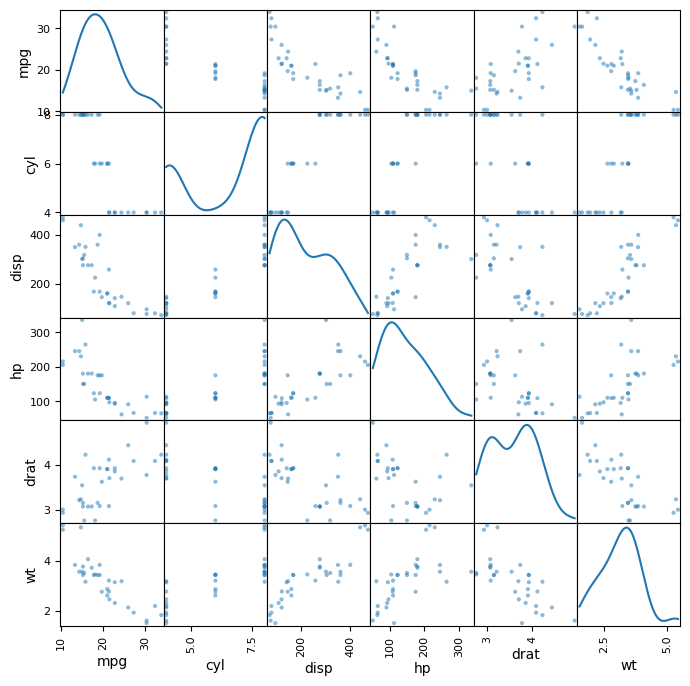

In [23]:
scatter_matrix(mtcars.iloc[:, 0:6],
              figsize = (8, 8), 
              diagonal = 'kde')  

Note: 


1. A scatter plot matrix creates pairwise scatter plots that let you visually inspect the relationships between pairs of variables.
   
2. It can also help identify oddities in the data, such as variables like cyl that only take on values in a small discrete set.  

3. If you find **highly correlated** variables, there are a few things you can do including:

    1) Leave them be
    2) Remove one or more variables
    3) Combine them in some way
       
4. Reducing the number of variables under consideration, either by removing some or by combining them some way is known as "**dimensionality reduction**."

5. How you choose to handle correlated variables is ultimately a subjective decision that should be informed by your goal.

# Imputing with Sklearn¶

1. Missing values in numeric data are troublesome because you can't simply treat them as a category: you have to either remove them or fill them in.

2. Imputation describes filling in missing data with estimates based on the rest of the data set.

3. When working with the titanic data set, we set all the missing Age values to the median age for the data set.

4. Other simple imputation methods include:

    1) setting missing values to the mean or most common value (mode.).
    2) The **scikit-learn** offers an Imupter tool that can **automatically carry out these imputations** for us.

Let's start by loading the Imputer and introducing some missing values into the mpg data: 

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
# The following line sets a few mpg values to None

mtcars['mpg'] = np.where(mtcars['mpg'] >  22, None, 
                         mtcars['mpg'])  

mtcars['mpg'] 

model
Mazda RX4              21.0
Mazda RX4 Wag          21.0
Datsun 710             None
Hornet 4 Drive         21.4
Hornet Sportabout      18.7
Valiant                18.1
Duster 360             14.3
Merc 240D              None
Merc 230               None
Merc 280               19.2
Merc 280C              17.8
Merc 450SE             16.4
Merc 450SL             17.3
Merc 450SLC            15.2
Cadillac Fleetwood     10.4
Lincoln Continental    10.4
Chrysler Imperial      14.7
Fiat 128               None
Honda Civic            None
Toyota Corolla         None
Toyota Corona          21.5
Dodge Challenger       15.5
AMC Javelin            15.2
Camaro Z28             13.3
Pontiac Firebird       19.2
Fiat X1-9              None
Porsche 914-2          None
Lotus Europa           None
Ford Pantera L         15.8
Ferrari Dino           19.7
Maserati Bora          15.0
Volvo 142E             21.4
Name: mpg, dtype: object

**Now let's use the Imputer fill in missing values based on the mean:**

In [26]:
# 1. Create imputation model 
# 2. Use mean imputation 
# 3. Impute by column 
# 4. Use imputation model to get values  
# 5. Remake DataFrame with new values 

imp = SimpleImputer(strategy = 'mean')  

imputed_cars = imp.fit_transform(mtcars) 

imputed_cars = pd.DataFrame(imputed_cars,
                            index = mtcars.index, 
                            columns = mtcars.columns) 

imputed_cars.head(10) 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.000000,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.000000,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,17.065217,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.400000,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.700000,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.100000,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.300000,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,17.065217,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,17.065217,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
